# The Jaynes Cummings model
Consider a single optical field mode of frequency ω coupled to a single two-level atom.
ments a resonant energy exchange between the atom and the field.


First we define the atom basis using the spinbasis function and we define the raising, the lowering operator, and the Pauli operator

In [3]:
using QuantumOptics

b_spin = SpinBasis(1//2)
sp = sigmap(b_spin); # raising operator
sm = sigmam(b_spin); # lowering operator
sz = sigmaz(b_spin); # pauli operator

Then we define the fock basis of the field and the corresponding operators

In [4]:
b_fock = FockBasis(10)
a = destroy(b_fock);
at = create(b_fock);

We can combine the Hilbert spaces with the tensor product, and we define the Jaynes Cumming Hamiltonian $H = \omega_a \frac{\sigma_z}{2}+ \omega_c a^\dagger a + \Omega(\sigma_+a + \sigma_-a^\dagger)$, we also compute the energy spectrum for the first five eigenstates

In [5]:
ωc = 0.1
ωa = 0.1
Ω = 1.0

b_product = b_fock⊗b_spin

Hatom = ωa*sz/2
Hfield = ωc*at*a
Hint = Ω*(at⊗sm + a⊗sp)
H = identityoperator(b_fock)⊗Hatom + Hfield⊗identityoperator(b_spin) + Hint

Ev,ϕ = eigenstates((H+dagger(H))/2,5);


Evolution of the initial state $\psi_0 = |0>_{field}\otimes |1>_{atom}$

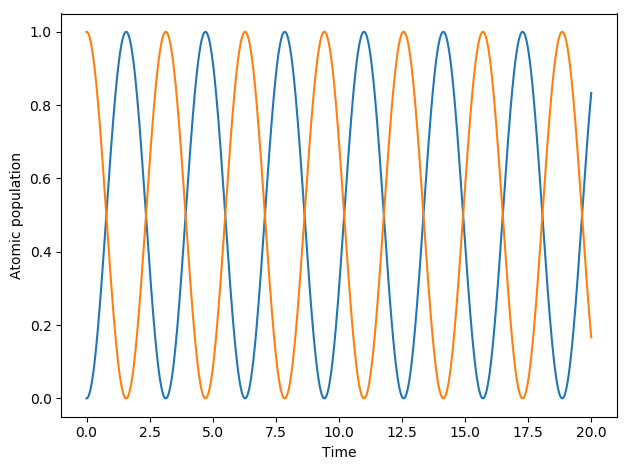

In [10]:
T = [0:0.01:20;]
vacuum = basisstate(b_fock,1)
ψ0 = vacuum⊗spinup(b_spin)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

#plot of the photon number
using PyPlot
plot(tout, expect(1, at*a, ψt))
xlabel("Time")
ylabel("Expectation value of aa+")
tight_layout()
savefig("photon number.svg")


plot(tout, expect(2, sp*sm, ψt))
xlabel("Time")
ylabel("Atomic population")
tight_layout()
savefig("composite.svg")